<a href="https://colab.research.google.com/github/saraiva142/-Saraiva-Arq./blob/main/Geometria%20Anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados o(s) foco(s) e o(s) pontos extremos , construir as curvas (Elipse, parábolas e hipérbole);

##**Elipse**
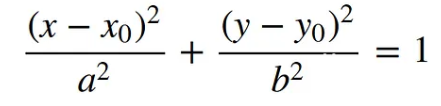

onde (h,k) é o centro, a é o semi-eixo maior e b é o semi-eixo menor

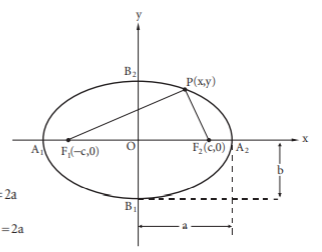

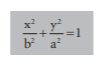

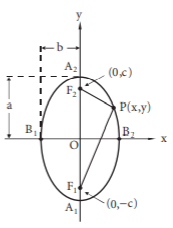

In [ ]:
pip install sympy

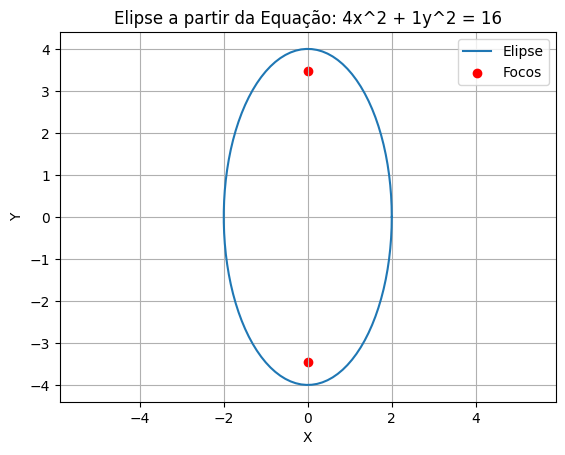

Coordenadas dos Focos:
Foco 1 (F1): (0, -3.4641016151377544)
Foco 2 (F2): (0, 3.4641016151377544)
Semi-eixo maior (a): 2.0
Semi-eixo menor (b): 4.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

def plot_elipse_from_equation(equation):
    match = re.match(r"(\d+)x\^2 \+ (\d+)y\^2 = (\d+)", equation)
    if not match:
        print("Formato da equação inválido.")
        return

    A, B, C = map(float, match.groups())

    if A <= 0 or B <= 0:
        print("A equação não representa uma elipse válida.")
        return

    h = 0  # O centro (h, k) está no eixo x da forma (x - h)^2, aqui h=0
    k = 0  # O centro (h, k) está no eixo y da forma (y - k)^2, aqui k=0

    a = np.sqrt(C / A)
    b = np.sqrt(C / B)

    if np.isnan(a) or np.isnan(b):
        print("A equação não representa uma elipse válida.")
        return


    c = np.sqrt(abs(a**2 - b**2))
    #Tratando se o eixo maior vai ser no eixo Y ou eixo X
    F1 = (h, k - c) if A > B else (h - c, k)
    F2 = (h, k + c) if A > B else (h + c, k)

    theta = np.linspace(0, 2 * np.pi, 100)
    x = h + a * np.cos(theta)
    y = k + b * np.sin(theta)

    plt.plot(x, y, label='Elipse')
    plt.scatter([F1[0], F2[0]], [F1[1], F2[1]], color='red', label='Focos')
    plt.title(f'Elipse a partir da Equação: {equation}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    print(f'Coordenadas dos Focos:')
    print(f'Foco 1 (F1): {F1}')
    print(f'Foco 2 (F2): {F2}')
    print(f'Semi-eixo maior (a): {a}')
    print(f'Semi-eixo menor (b): {b}')

equation = "4x^2 + 1y^2 = 16"
plot_elipse_from_equation(equation)


##Parábola

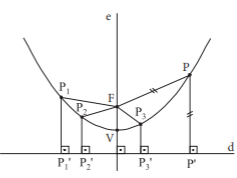

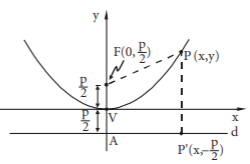

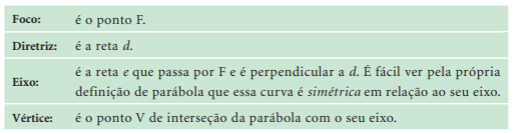

***x^2 = 2py***

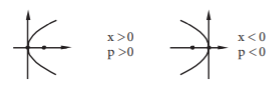

* Entrada como equação:
Esse aqui não ficou muito legal não, se possível pular para o de vértice e foco que foquei mais kk

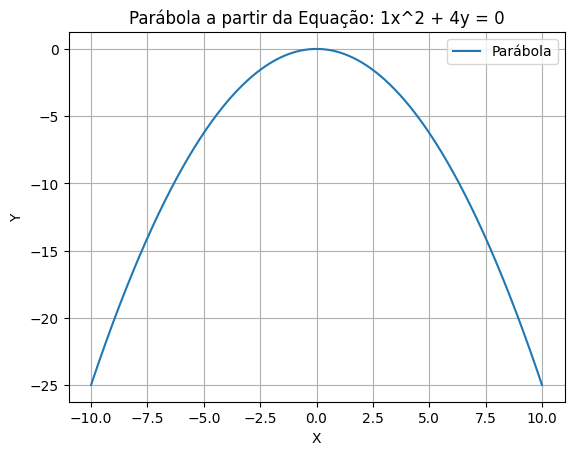

Vértice da Parábola:
Vertice: (0, 0)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

def plot_parabola_from_equation(equation):
    match = re.match(r"(\d+)x\^2 \+ (\d+)y = 0", equation)
    if not match:
        print("Formato da equação inválido.")
        return

    A, B = map(float, match.groups())

    if A == 0 or B == 0:
        print("A equação não representa uma parábola válida.")
        return

    # Vértice da parábola (sempre na origem para esta forma de equação)
    h = 0
    k = 0


    x = np.linspace(-10, 10, 1000)
    y = -A * x**2 / B

    plt.plot(x, y, label='Parábola')
    plt.title(f'Parábola a partir da Equação: {equation}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Vértice da Parábola:')
    print(f'Vertice: ({h}, {k})')

# Exemplo de uso com a equação fornecida
equation = "1x^2 + 4y = 0"
plot_parabola_from_equation(equation)


* Entrada apenas com focos e vértice

A parábola y = 1(x - 5)^2 + 4 abre para a direita.


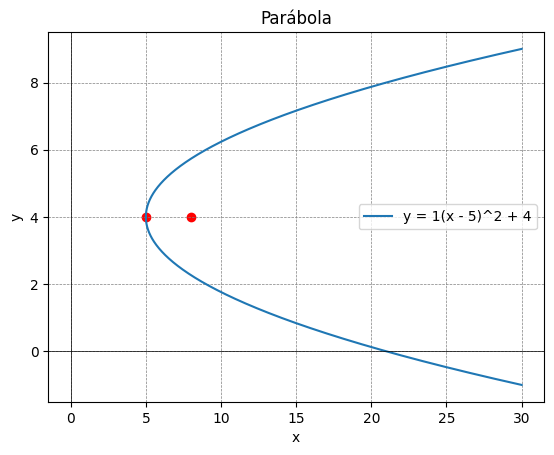

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def criar_parabola(vertice, foco):
    h, k = vertice
    f, g = foco

    # Determinar a direção da abertura
    if h == f:
        # Parábola abre para cima ou para baixo
        a = 1 if g > k else -1
        direcao = "para cima" if g > k else "para baixo"
        equacao = f"y = {a}(x - {h})^2 + {k}"
        x = np.linspace(h - 5, h + 5, 1000)
        y = a * (x - h)**2 + k
    elif k == g:
        # Parábola abre para a direita ou para a esquerda
        a = 1 if f > h else -1
        direcao = "para a direita" if f > h else "para a esquerda"
        equacao = f"y = {a}(x - {h})^2 + {k}"
        y = np.linspace(k - 5, k + 5, 1000)
        x = a * (y - k)**2 + h
    else:
        raise ValueError("Vértice e foco não definem uma parábola válida.")

    print(f"A parábola {equacao} abre {direcao}.")


    # Plotar a parábola
    plt.plot(x, y, label=equacao)
    plt.scatter([h, f], [k, g], color='red')  # Marcando vértice e foco
    plt.title('Parábola')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()

# Exemplo de uso:
vertice = (5, 4)
foco = (8, 4)
criar_parabola(vertice, foco)


##Hipérbole

A hipérbole ((x - 5)^2) / (3^2) - ((y - 4)^2) / (1.5^2) = 1 é horizontal.


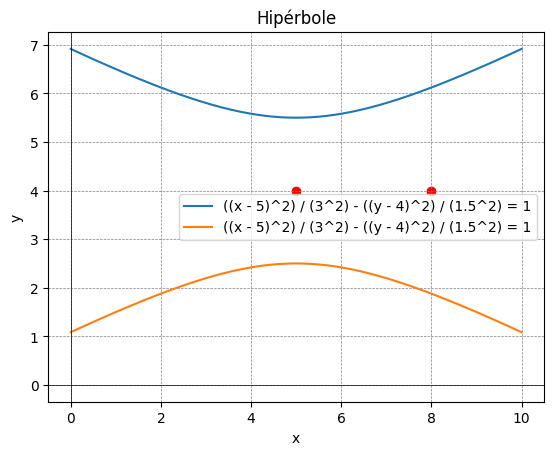

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def criar_hiperbole(centro, foco):
    h, k = centro
    f, g = foco

    # Determinar a direção dos eixos
    if h == f:
        # Eixo vertical
        a = abs(g - k)
        b = abs(g - k) / 2  # Escolha um valor adequado para b
        direcao = "vertical"
        equacao = f"((x - {h})^2) / ({a}^2) - ((y - {k})^2) / ({b}^2) = 1"
        y = np.linspace(k - 5, k + 5, 1000)
        x_positive = h + a * np.sqrt(1 + ((y - k) / b)**2)
        x_negative = h - a * np.sqrt(1 + ((y - k) / b)**2)
    elif k == g:
        # Eixo horizontal
        a = abs(f - h)
        b = abs(f - h) / 2  # Escolha um valor adequado para b
        direcao = "horizontal"
        equacao = f"((x - {h})^2) / ({a}^2) - ((y - {k})^2) / ({b}^2) = 1"
        x = np.linspace(h - 5, h + 5, 1000)
        y_positive = k + b * np.sqrt(1 + ((x - h) / a)**2)
        y_negative = k - b * np.sqrt(1 + ((x - h) / a)**2)
    else:
        raise ValueError("Centro e foco não definem uma hipérbole válida.")

    print(f"A hipérbole {equacao} é {direcao}.")

    # Plotar a hipérbole
    if h == f:
        plt.plot(x_positive, y, label=equacao)
        plt.plot(x_negative, y, label=equacao)
    elif k == g:
        plt.plot(x, y_positive, label=equacao)
        plt.plot(x, y_negative, label=equacao)

    plt.scatter([h, f], [k, g], color='red')  # Marcando centro e foco
    plt.title('Hipérbole')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Exemplo de uso:
centro = (5, 4)
foco = (8, 4)
criar_hiperbole(centro, foco)
